In [1]:
import nbsetup
import numpy as np
import ergodicpy as ep
from scipy.stats import chi2_contingency
import pandas as pd

In [2]:
def chi2(data):
    chi2, p, dof, expected = chi2_contingency(data)
    result = "Reject H0, they are dependant" if p < 0.05 else "Accept H0, they are independant"
    print('%s (X2=%s,p=%s)' % (result,chi2, p))
    print("")
    print(np.array(data))
    print("")
    print("%s ergodic complexity" % ep.measures(data)['complexity'])
    print(ep.measures(data))
    #return "Dependant" if p < 0.05 else "independant"


def split_ensemble(data, r=1):
    data = np.array(data).copy()
    row = data[r]/2
    data[r] = row
    data = np.append(data, [row], axis=0)
    return data

def double_ensemble(data, r=1):
    data = np.array(data).copy()
    data[r] *= 2
    return data
    

https://helloml.org/an-introduction-to-the-chi-squared-test-with-examples/

A Chi-Square test of independence uses the following null and alternative hypotheses:

- H0: (null hypothesis) The two variables are independent.
- H1: (alternative hypothesis) The two variables are not independent. (i.e. they are associated)

If the p-value that corresponds to the test statistic X2 with (#rows-1)*(#columns-1) degrees of freedom is less than your chosen significance level then you can reject the null hypothesis.

# Making dependant results independant

Let's say we are looking at something trivial such as a childs favourite color (my daughter's favourite is "rainbow" ¯\\\_(ツ)\_/¯).

Here, for the sake of clarity, using the terminology of ergodic complexity - we're going to say that gender represents `ensembles` (i.e. different sample populations), while colour represents `states` of the system.

First let's baseline with a data set where there is no preference of colour between girls and boys. We find that the p-value is > 0.05, so we accept the null hypothesis `H0` and say they are independant.

In [160]:
independant = [
    # Blue, Green, Pink
    [100, 20, 150], # boys
    [110, 18, 142]] # girls

chi2(independant)

Accept H0, they are independant (X2=0.8006317162769938,p=0.6701083534278778)

[[100  20 150]
 [110  18 142]]

0.0017245109787449866 ergodic complexity
{'ensemble': 0.8857665289187394, 'ergodic': 0.8865080918127473, 'divergence': 0.0007415628940078967, 'complexity': 0.0017245109787449866, 'tau2': 0.0009148173887354706, 'tau2p': 0.9758709038312277}


Now let's take an another ficticous dataset, but this time where there is a preference between girls and boys. Where girls slightly prefer pink. We now find we reject `H0`.

In [161]:
dependant = [
    # Blue, Green, Pink
    [100, 20, 150], # boys
    [125, 30, 290]] # Boys

chi2(dependant)

Reject H0, they are dependant (X2=6.904690895639712,p=0.03167126589457268)

[[100  20 150]
 [125  30 290]]

0.03703540705484103 ergodic complexity
{'ensemble': 0.8438453427023884, 'ergodic': 0.8486397166676904, 'divergence': 0.004794373965301995, 'complexity': 0.03703540705484103, 'tau2': 0.42192642765375166, 'tau2p': 0.5159773562368908}


However, let's say we're unethical and this isn't the result we want. What we can do is split the girls ensemble in two and create an extra ensemble based on some other field we might have collected. Perhaps, girls > 5yrs and girls < 5 yrs.

In [162]:
chi2(split_ensemble(dependant))

Accept H0, they are independant (X2=7.0217029380656095,p=0.13474575970649377)

[[100.   20.  150. ]
 [ 62.   15.  145. ]
 [ 62.5  15.  145. ]]

0.03732739287918715 ergodic complexity
{'ensemble': 0.843545271692169, 'ergodic': 0.8484239681533361, 'divergence': 0.004878696461167182, 'complexity': 0.03732739287918715, 'tau2': 0.4286055590130628, 'tau2p': 0.5126739735780768}


We now get the result that we accept `H0` and can say they are independant. Now this third ensemble may not stand up to scrutiny, however that doesn't matter in this case since we're got the hacked result we want. Logic says, if there's independance between girls of different ages and boys, they've certainly got to be independant is you aggregate girls together... right?

### Why did this happen?

It's all about volumes. To illustrate, let's say we have twice the number of girls to begin with because of some samplying bias. We still Reject H0 and say they are dependant.

In [163]:
# double girls row
chi2(double_ensemble(dependant))

Reject H0, they are dependant (X2=8.67118971474828,p=0.013094082644208454)

[[100  20 150]
 [250  60 580]]

0.032424770961447594 ergodic complexity
{'ensemble': 0.8337516114820531, 'ergodic': 0.8374155903356688, 'divergence': 0.003663978853615666, 'complexity': 0.032424770961447594, 'tau2': 0.32341213993114265, 'tau2p': 0.569564253404966}


Now again, let's split the girls ensemble, so that it ends up Accepting H0 and saying it's independant.

In [164]:
# duplicate girls row
chi2(split_ensemble(double_ensemble(dependant)))

Accept H0, they are independant (X2=8.671189714748278,p=0.06986472001847062)

[[100.  20. 150.]
 [125.  30. 290.]
 [125.  30. 290.]]

0.032424770961447594 ergodic complexity
{'ensemble': 0.8337516114820531, 'ergodic': 0.8374155903356688, 'divergence': 0.003663978853615666, 'complexity': 0.032424770961447594, 'tau2': 0.32341213993114265, 'tau2p': 0.569564253404966}


In [165]:
# again for reference
chi2(dependant)

# double and split both
chi2(split_ensemble(split_ensemble(double_ensemble(double_ensemble(dependant),0)),0))

Reject H0, they are dependant (X2=6.904690895639712,p=0.03167126589457268)

[[100  20 150]
 [125  30 290]]

0.03703540705484103 ergodic complexity
{'ensemble': 0.8438453427023884, 'ergodic': 0.8486397166676904, 'divergence': 0.004794373965301995, 'complexity': 0.03703540705484103, 'tau2': 0.42192642765375166, 'tau2p': 0.5159773562368908}
Reject H0, they are dependant (X2=13.809381791279423,p=0.03183948813397328)

[[100.  20. 150.]
 [125.  30. 290.]
 [125.  30. 290.]
 [100.  20. 150.]]

0.03703540705484103 ergodic complexity
{'ensemble': 0.8438453427023884, 'ergodic': 0.8486397166676904, 'divergence': 0.004794373965301995, 'complexity': 0.03703540705484103, 'tau2': 0.42192642765375166, 'tau2p': 0.5159773562368908}


The thing to notice, is here we find that X2 (Chi2) metric is the same for both datasets - which implies we should get the same result. However, because the Chi2 distribution only takes degree's of freedom into account (i.e. the number of states & number of ensembles) and not the number of observations - the resulting p-value is different.

# Making independant results dependant

It's even easier doing this in reverse. You can even use states or ensembles. Here let's use states instead.

Say you start with colors Blue, Green, Salmon Pink, Bright Pink. The results here show that there is no difference between girls and boys (they are independant).

In [166]:
more_states = [
    # Blue, Green, Salmon Pink, Bright Pink
    [100, 20, 75, 75], # boys
    [110, 18, 50, 50]] # girls
chi2(more_states)

Accept H0, they are independant (X2=7.089712585557464,p=0.06909263766557944)

[[100  20  75  75]
 [110  18  50  50]]

0.02515633555997716 ergodic complexity
{'ensemble': 1.2472450176882064, 'ergodic': 1.254376603438616, 'divergence': 0.0071315857504095715, 'complexity': 0.02515633555997716, 'tau2': 0.2456451796722656, 'tau2p': 0.6201582713595564}


And again, let's say you're unethical and this isn't the result you want. You can p-hack the results by grouping the pinks together into a single state. Now changing the result from Independant to Dependant.

In [167]:
fewer_states = [
    # Blue, Green, Pink
    [100, 20, 75*2], # boys
    [110, 18, 50*2]] # girls
chi2(fewer_states)

Reject H0, they are dependant (X2=7.089712585557464,p=0.028872771437316067)

[[100  20 150]
 [110  18 100]]

0.015697144681952067 ergodic complexity
{'ensemble': 0.8992795655998804, 'ergodic': 0.9064111513502902, 'divergence': 0.007131585750409708, 'complexity': 0.015697144681952067, 'tau2': 0.07579556704251132, 'tau2p': 0.7830781228754189}


Again we can see the X2 results are identical (because the same total volumes of observations were used) but the p-values now varied because the degree's of freedom has changed.

In [168]:
def analyse(data, units='bits'):
    erg = ep.ergodic_entropy(data, weights=None, units=units)
    print('erg', ep.ergodic_ensemble(data), erg)
    ents = ep.ensemble_entropies(data, units=units)
    print('ents', ents)
    print('divs', [(erg-e) for e in ents])
    print('complexity', ep.measures(data, units=units)['complexity'])
    return ents

In [169]:
analyse([[0.5, 0.5], [0.5, 0.5]])

erg [0.5 0.5] 1.0
ents [1.0, 1.0]
divs [0.0, 0.0]
complexity 0.0


[1.0, 1.0]

In [170]:
analyse([[0.5, 0.25, 0.25], [0.5, 0.25, 0.25]])

erg [0.5  0.25 0.25] 1.5
ents [1.5, 1.5]
divs [0.0, 0.0]
complexity 0.0


[1.5, 1.5]

In [171]:
analyse([[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]])

erg [0.25 0.25 0.25 0.25] 2.0
ents [2.0, 2.0]
divs [0.0, 0.0]
complexity 0.0


[2.0, 2.0]

In [172]:
analyse([[0.8, 0.2], [0.9, 0.1]])
print("")
analyse([[0.4, 0.4, 0.1, 0.1], [0.45, 0.45, 0.05, 0.05]])

erg [0.85 0.15] 0.6098403047164003
ents [0.7219280948873623, 0.4689955935892812]
divs [-0.11208779017096204, 0.14084471112711905]
complexity 0.16298795588578477

erg [0.425 0.425 0.075 0.075] 1.6098403047164005
ents [1.7219280948873623, 1.4689955935892813]
divs [-0.11208779017096182, 0.14084471112711916]
complexity 0.10031645504205548


[1.7219280948873623, 1.4689955935892813]

In [173]:
less = analyse([[0.8, 0.2], [0.9, 0.1]])
print("")
more = analyse([[0.4,0.4, 0.2], [0.25,0.65, 0.1]])

erg [0.85 0.15] 0.6098403047164003
ents [0.7219280948873623, 0.4689955935892812]
divs [-0.11208779017096204, 0.14084471112711905]
complexity 0.16298795588578477

erg [0.325 0.525 0.15 ] 1.4255741644244848
ents [1.5219280948873621, 1.236160254373812]
divs [-0.09635393046287732, 0.18941391005067287]
complexity 0.12585639254381126


In [174]:
np.array(more)-np.array(less)

array([0.8       , 0.76716466])

<ipython-input-175-38d3722d1604>:16: RuntimeWarning: divide by zero encountered in log2
  'p': -(f*np.log2(f)+(s)*np.log2(s))*i,
<ipython-input-175-38d3722d1604>:16: RuntimeWarning: invalid value encountered in double_scalars
  'p': -(f*np.log2(f)+(s)*np.log2(s))*i,


<AxesSubplot:xlabel='i', ylabel='p'>

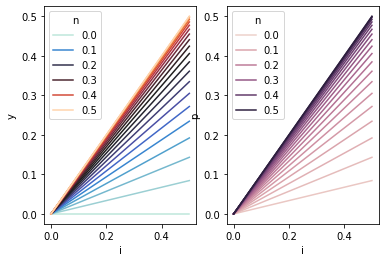

In [175]:
upper = 0.5
lower = 0.0

data = []
for n in ep.binspace(lower,upper,20):
    for i in ep.binspace(lower,upper,20):
        f, s = n, 1-n
        m = ep.shannon_entropy([i*(f),i*(s), 1-i], units='bits')
        l = ep.shannon_entropy([i, 1-i], units='bits')
        data.append({
            'n': n,
            'i': i,
            'm': m,
            'l': l,
            'y': m-l,
            'p': -(f*np.log2(f)+(s)*np.log2(s))*i,
        })

df = pd.DataFrame(data=data)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)
sns.lineplot(data=df, x='i', y='y', hue='n', palette='icefire', ax=axes[0])
sns.lineplot(data=df, x='i', y='p', hue='n', ax=axes[1])

<ipython-input-142-2ab17c16cf42>:8: RuntimeWarning: divide by zero encountered in log2
  sns.scatterplot(x=xx, y=[-(x*np.log2(x)+(1-x)*np.log2(1-x)) for x in xx])
<ipython-input-142-2ab17c16cf42>:8: RuntimeWarning: invalid value encountered in double_scalars
  sns.scatterplot(x=xx, y=[-(x*np.log2(x)+(1-x)*np.log2(1-x)) for x in xx])


<AxesSubplot:>

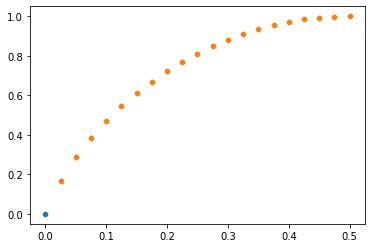

In [142]:
xx = df['n'].unique()
yy = []
for n in xx:
    up = float(df[(df['n'] == n) & (df['i'] == upper)]['y'])
    lo = float(df[(df['n'] == n) & (df['i'] == lower)]['y'])
    yy.append((up-lo)/(upper-lower))
sns.scatterplot(x=xx, y=[y for y in yy])
sns.scatterplot(x=xx, y=[-(x*np.log2(x)+(1-x)*np.log2(1-x)) for x in xx])